In [1]:
import numpy as np
import pandas as pd

In [2]:
dfm=pd.read_csv("movies.csv")
dfr=pd.read_csv("ratings.csv")

## EDA

In [3]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
dfm.shape

(9742, 3)

In [6]:
dfr.shape

(100836, 4)

In [7]:
dfm.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
dfr.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
dfm.duplicated().sum()

0

In [10]:
dfr.duplicated().sum()

0

In [11]:
df=dfr.merge(dfm,on="movieId")

In [12]:
df.shape

(100836, 6)

In [13]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [14]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [15]:
df.duplicated(subset=['userId', 'movieId']).sum()#to check whether a user has rated a movie twice

0

In [16]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [17]:
df['rating'].max()

5.0

## GRAPHS

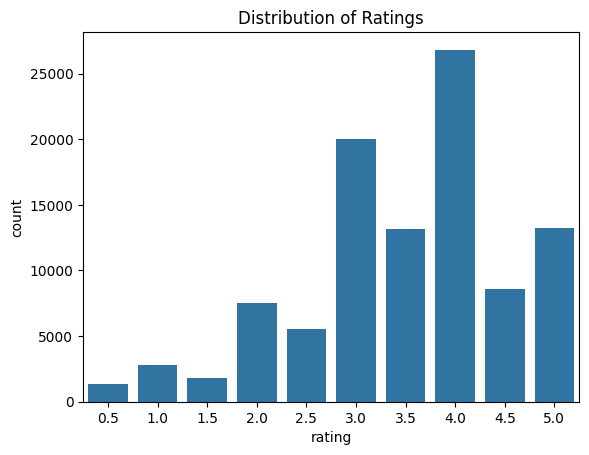

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.show()  #shows the distribution of ratings 

In [19]:
df.groupby('userId')['rating'].count().sort_values(ascending=False).reset_index()#for finding the no. of ratings each user have

,userId,rating
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,442,20
606,569,20
607,320,20
608,576,20


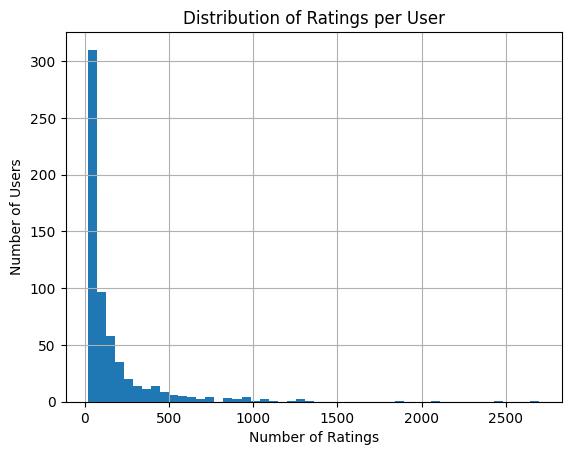

In [20]:
rate=df.groupby('userId')['rating'].count()  #for finding the no. of ratings each user have
rate.hist(bins=50)
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


In [21]:
num_r=df.groupby('title')['rating'].count().sort_values(ascending=False).reset_index() #no. of ratings per movie
num_r

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,King Solomon's Mines (1950),1
9715,King Solomon's Mines (1937),1
9716,King Ralph (1991),1
9717,King Kong Lives (1986),1


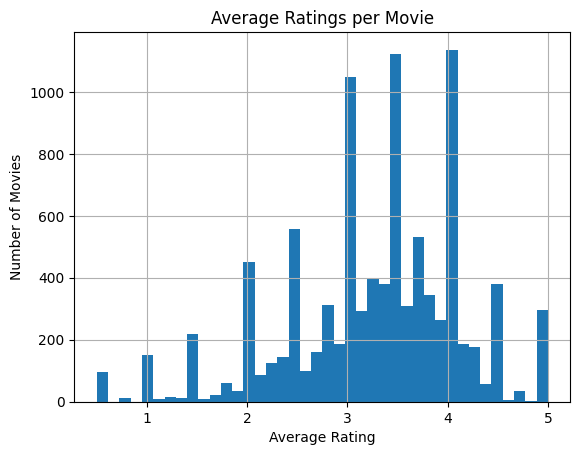

In [22]:
avg = df.groupby('title')['rating'].mean().reset_index()
avg.hist(bins=40)
plt.title("Average Ratings per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()                                


# Popularity Based Recommendation

### Based_on_Average_Rating

In [23]:
avg_r=df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index() #avg rating of each movie
avg_r

,title,rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0
...,...,...
9714,Don't Look Now (1973),0.5
9715,Journey 2: The Mysterious Island (2012),0.5
9716,Joe Dirt 2: Beautiful Loser (2015),0.5
9717,Jesus Christ Vampire Hunter (2001),0.5


In [24]:
avg_r.rename(columns={"rating":"average_rating"},inplace=True)#rename col for better clarity of what column represent
num_r.rename(columns={"rating":"num_rating"},inplace=True)

In [25]:
avg_r.head()

,title,average_rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0


In [26]:
pop=avg_r.merge(num_r,on="title") #merge the avg and no. of rating dataset
pop

,title,average_rating,num_rating
0,Gena the Crocodile (1969),5.0,1
1,True Stories (1986),5.0,1
2,Cosmic Scrat-tastrophe (2015),5.0,1
3,Love and Pigeons (1985),5.0,1
4,Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...,...
9714,Don't Look Now (1973),0.5,1
9715,Journey 2: The Mysterious Island (2012),0.5,1
9716,Joe Dirt 2: Beautiful Loser (2015),0.5,1
9717,Jesus Christ Vampire Hunter (2001),0.5,1


In [27]:
dfpop=pop[pop['num_rating']>=140].sort_values("average_rating",ascending=False)#It shows Top highest avg rating movies with certain threshold for no. of ratings 

In [28]:
dfpop.reset_index(drop=True, inplace=True)
dfpop.index=dfpop.index+1
dfpop.shape

(59, 3)

In [29]:
top50=dfpop.head(50)
top50

,title,average_rating,num_rating
1,"Shawshank Redemption, The (1994)",4.429022,317
2,"Godfather, The (1972)",4.289062,192
3,Fight Club (1999),4.272936,218
4,"Dark Knight, The (2008)",4.238255,149
5,"Usual Suspects, The (1995)",4.237745,204
6,"Princess Bride, The (1987)",4.232394,142
7,Star Wars: Episode IV - A New Hope (1977),4.231076,251
8,Schindler's List (1993),4.225000,220
9,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
10,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200


### WEIGHTED_RATING_FORMULA(IMDB)
### WR = (v/(v+m))R + (m/(v+m))C. 
##### Here, WR represents the weighted rating, R is the average movie rating, v is the number of votes for the movie, m is the minimum number of votes required to be listed and C is the average of all movie ratings.

In [30]:
c=pop['average_rating'].mean()
c

3.2623883953257353

In [31]:
# m=120

In [32]:
# pop['w_rating']=(pop['num_rating']/(pop['num_rating']+m))*pop['average_rating']+(m/(pop['num_rating']+m))*c

In [33]:
# df_popwr=pop.sort_values('w_rating',ascending=False).head(50)
# df_popwr.reset_index(drop=True,inplace=True)
# df_popwr.index=df_popwr.index+1

In [34]:
# df_popwr

In [35]:
c=dfpop['average_rating'].mean()

In [36]:
m=140

In [37]:
dfpop['w_rating']=(dfpop['num_rating']/(dfpop['num_rating']+m))*dfpop['average_rating']+(m/(dfpop['num_rating']+m))*c

In [38]:
df_popwr=dfpop.sort_values('w_rating',ascending=False).head(50)
df_popwr.reset_index(drop=True,inplace=True)
df_popwr.index=df_popwr.index+1

In [39]:
df_popwr

,title,average_rating,num_rating,w_rating
1,"Shawshank Redemption, The (1994)",4.429022,317,4.268328
2,Fight Club (1999),4.272936,218,4.128843
3,"Godfather, The (1972)",4.289062,192,4.126885
4,Star Wars: Episode IV - A New Hope (1977),4.231076,251,4.114133
5,Pulp Fiction (1994),4.197068,307,4.105427
6,"Usual Suspects, The (1995)",4.237745,204,4.102110
7,Schindler's List (1993),4.225000,220,4.100349
8,"Matrix, The (1999)",4.192446,278,4.095995
9,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211,4.091527
10,Forrest Gump (1994),4.164134,329,4.086622


# COLLABRATIVE FILTERING

## Cosine Similarity

In [40]:
rate=df.groupby('userId')['rating'].count().reset_index()

x=rate[rate['rating']>50] #Take only experienced users with at least 50 ratings

num_r=df.groupby('title')['rating'].count().reset_index()

y=num_r[num_r['rating']>=90] #Only movies with more than or equal to threshold ratings are considerd

In [41]:
df=df[df['userId'].isin(x['userId'])] 

df=df[df['title'].isin(y['title'])] #select the rows in original dataset which completes the above condition

In [42]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
...,...,...,...,...,...,...
100318,610,59315,4.0,1493844870,Iron Man (2008),Action|Adventure|Sci-Fi
100326,610,60069,4.5,1493844866,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
100380,610,68954,3.5,1493844881,Up (2009),Adventure|Animation|Children|Drama
100417,610,72998,4.5,1479544106,Avatar (2009),Action|Adventure|Sci-Fi|IMAX


In [43]:
pt=df.pivot_table(index='title',columns='userId',values='rating')

In [44]:
pt

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,...,4.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.0,4.5
Ace Ventura: Pet Detective (1994),NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,3.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.5,3.0
Aladdin (1992),NaN,4.0,5.0,3.0,4.0,NaN,3.0,NaN,NaN,3.5,...,3.5,NaN,NaN,NaN,3.0,3.5,NaN,NaN,3.0,NaN
Alien (1979),4.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,4.0,...,2.5,NaN,NaN,5.0,NaN,NaN,4.0,3.0,4.0,4.5
Aliens (1986),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,2.0,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
While You Were Sleeping (1995),NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,3.0,3.0,3.0,NaN,NaN,NaN,2.5,NaN
Who Framed Roger Rabbit? (1988),5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,3.0,NaN
Willy Wonka & the Chocolate Factory (1971),5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,3.5,NaN


In [45]:
pt.fillna(0,inplace=True)

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
similarity_score=cosine_similarity(pt)

In [48]:
similarity_score[0]

array([1.        , 0.32782487, 0.30484132, 0.60987532, 0.60743364,
       0.33997747, 0.48943181, 0.37894308, 0.37465883, 0.60468619,
       0.36525543, 0.27535976, 0.35967009, 0.39338195, 0.40149099,
       0.35952037, 0.31192597, 0.51627867, 0.41650539, 0.37554716,
       0.26417882, 0.33091705, 0.34443872, 0.38967164, 0.46510379,
       0.40126882, 0.51840323, 0.68481465, 0.36340335, 0.40740713,
       0.42444975, 0.36625204, 0.48920102, 0.31330987, 0.34354146,
       0.25166385, 0.33467191, 0.18369323, 0.57128949, 0.24236896,
       0.22419652, 0.42396871, 0.34310471, 0.33049087, 0.3693005 ,
       0.54047795, 0.26184443, 0.38680337, 0.59392026, 0.27303311,
       0.49912073, 0.3259809 , 0.55868614, 0.46548122, 0.48020671,
       0.44467163, 0.3559714 , 0.21061025, 0.46809772, 0.2969227 ,
       0.4160093 , 0.55342089, 0.2776401 , 0.50904742, 0.44224197,
       0.53666523, 0.55259184, 0.32750105, 0.37151988, 0.50793803,
       0.43796552, 0.47851403, 0.27649099, 0.34185231, 0.26468

In [49]:
similarity_score.shape

(171, 171)

In [50]:
np.where(pt.index=="Willy Wonka & the Chocolate Factory (1971)")[0][0]

168

In [51]:
def recommend(mov_name):
    index=np.where(pt.index==mov_name)[0][0]
    similar=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar:
        print(pt.index[i[0]])
    

In [52]:
recommend('Batman (1989)')

True Lies (1994)
Batman Forever (1995)
Terminator 2: Judgment Day (1991)
Jurassic Park (1993)
Fugitive, The (1993)


In [53]:
#sorted(list(enumerate(similarity_score[0])),key=lambda x:x[1],reverse=True)[1:6]